In [ ]:
# ! pip install xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Classeur2.xlsx')
df

,SalesID,ItemID,CustomerID,DateID,CityID,Total,quantity,Profit
0,1,112,CUST-44505,2022-01-01,4,10.99,1,5
1,2,116,CUST-17838,2022-01-01,6,8.99,1,4
2,3,24,CUST-42677,2022-01-01,3,15.99,1,8
3,4,70,CUST-52773,2022-01-01,5,11.99,1,6
4,5,81,CUST-58348,2022-01-01,6,9.99,1,4
...,...,...,...,...,...,...,...,...
649919,649920,163,CUST-13027,2023-05-31,6,9.98,2,4
649920,649921,142,CUST-30437,2023-05-31,6,4.99,1,2
649921,649922,171,CUST-6128,2023-05-31,4,10.47,3,6
649922,649923,163,CUST-51465,2023-05-31,5,4.99,1,2


In [ ]:
df_fix=df

In [ ]:
# Convert to show date only
from datetime import datetime
df_fix["DateID"] = df_fix["DateID"].dt.date

# Create TotalSum colummn
df_fix["Total"] = df_fix["Total"]

# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.DateID) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'DateID': lambda x: (snapshot_date - x.max()).days,
    'SalesID': 'count',
    'Total': 'sum'})

# Rename columns
customers.rename(columns = {'DateID': 'Recency',
                            'SalesID': 'Frequency',
                            'Total': 'MonetaryValue'}, inplace=True)

In [ ]:
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
CUST-1,9,14,172.85
CUST-10,36,14,221.81
CUST-100,63,8,97.03
CUST-1000,51,8,89.92
CUST-10000,19,11,153.87


In [ ]:
data = customers.drop('Cluster', axis=1)

In [ ]:
start_index = 15456

# Affichez les 10 lignes à partir de l'index spécifié
result = data.iloc[start_index:start_index+10]
result

,Recency,Frequency,MonetaryValue
CustomerID,,,
CUST-23910,33,12,209.93
CUST-23911,59,7,174.88
CUST-23912,21,7,111.91
CUST-23913,180,9,118.89
CUST-23914,6,11,160.86
CUST-23915,36,11,129.00
CUST-23916,66,12,149.98
CUST-23917,35,12,144.84
CUST-23918,215,3,48.97


<ipython-input-6-1efa6460ee26>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers['Recency'], ax=ax[0])
<ipython-input-6-1efa6460ee26>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers['Frequency'],ax=ax[1],kde=True)
<ipython-input-6-1efa6460ee26>:4: UserWarning: 

`distplot` is

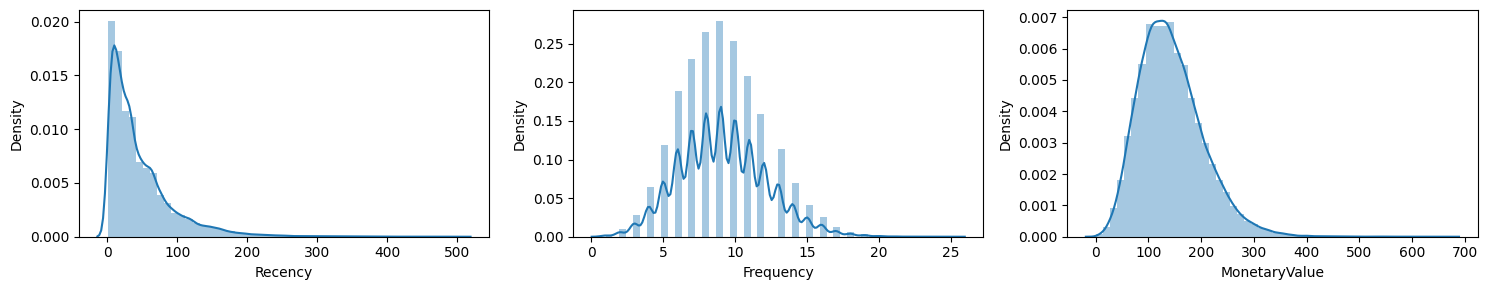

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'],ax=ax[1],kde=True)
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(customers[x], ax=ax[0,0])
    sns.distplot(np.log(customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(customers[x].skew().round(2))
    print(np.log(customers[x]).skew().round(2))
    print(np.sqrt(customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

<ipython-input-7-dfec49e72584>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers[x], ax=ax[0,0])
<ipython-input-7-dfec49e72584>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(customers[x]), ax=ax[0,1])
<ipython-input-7-dfec49e72584>:6: UserWarning: 

`distplot` is a deprecated 

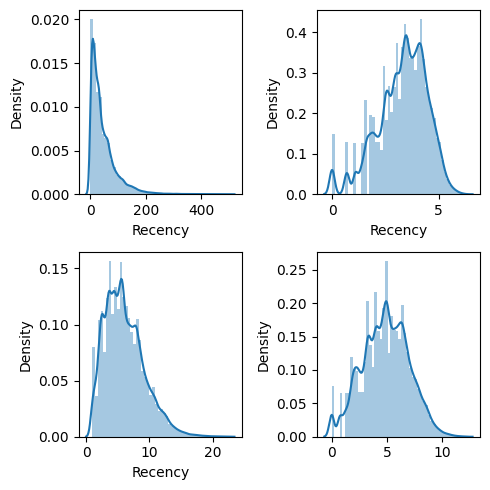

2.32
-0.6
0.8
-0.03


In [ ]:
analyze_skewness('Recency')

<ipython-input-7-dfec49e72584>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers[x], ax=ax[0,0])
<ipython-input-7-dfec49e72584>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(customers[x]), ax=ax[0,1])
<ipython-input-7-dfec49e72584>:6: UserWarning: 

`distplot` is a deprecated 

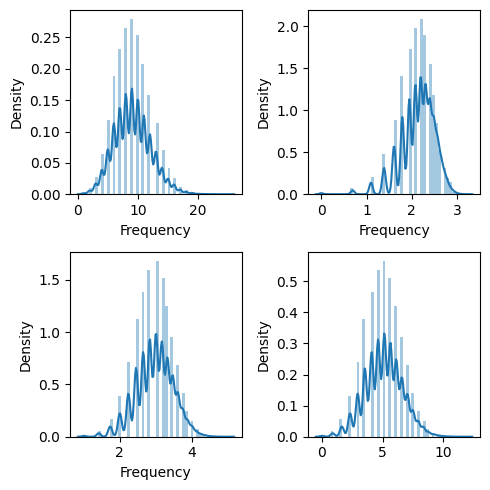

0.33
-0.93
-0.21
0.0


In [ ]:
analyze_skewness('Frequency')

<ipython-input-7-dfec49e72584>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers[x], ax=ax[0,0])
<ipython-input-7-dfec49e72584>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(customers[x]), ax=ax[0,1])
<ipython-input-7-dfec49e72584>:6: UserWarning: 

`distplot` is a deprecated 

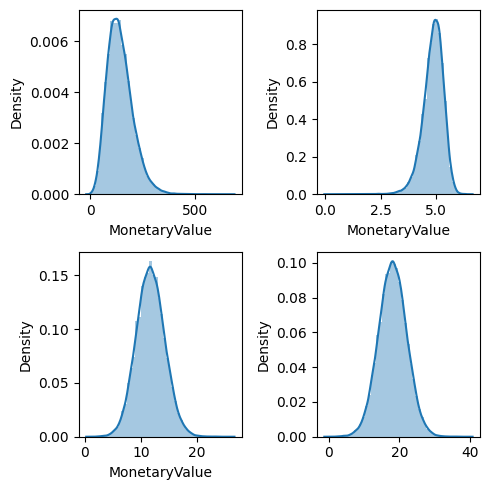

0.8
-0.81
0.09
0.01


In [ ]:
analyze_skewness('MonetaryValue')

In [ ]:
pd.Series(np.cbrt(customers['MonetaryValue'])).values

array([5.57044377, 6.05332104, 4.59517452, ..., 5.01197131, 6.37275199,
       5.25213821])

In [ ]:
# Set the Numbers
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = stats.boxcox(customers['MonetaryValue'])[0]
customers_fix.tail()

,Recency,Frequency,MonetaryValue
71241,5.437237,5.647663,20.020309
71242,4.232916,6.129983,18.388417
71243,3.445201,5.150120,17.371186
71244,4.232916,7.501904,24.880348
71245,5.630140,4.635089,18.649859


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[-0. -0. -0.]
[1. 1. 1.]


In [ ]:
pd.DataFrame(customers_normalized).head(10)

,0,1,2
0,-1.019200,1.548145,0.572692
1,0.144447,1.548145,1.245510
2,0.710220,-0.323745,-0.723423
3,0.489347,-0.323745,-0.870469
4,-0.430905,0.652347,0.283816
5,-0.740320,0.652347,0.159756
6,1.472300,-1.038899,-0.924114
7,0.675911,-2.277137,-1.709167
8,-0.802727,2.112127,1.372534
9,0.406366,0.652347,0.981927


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

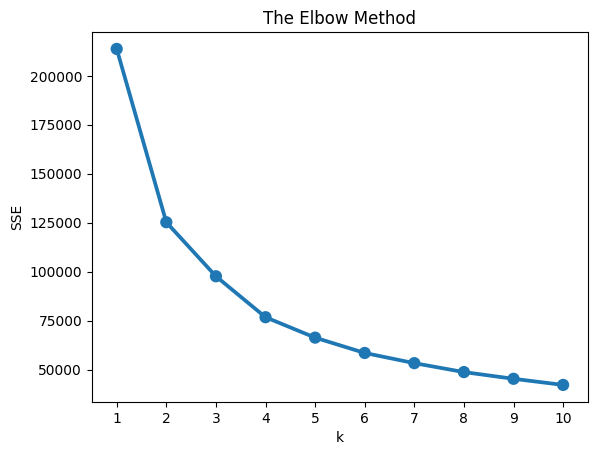

In [ ]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(71246,)

In [ ]:
customers.shape

(71246, 3)

In [ ]:
start_index = 15456

# Affichez les 10 lignes à partir de l'index spécifié
result = customers.iloc[start_index:start_index+15]
result

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
CUST-23910,33,12,209.93,1
CUST-23911,59,7,174.88,0
CUST-23912,21,7,111.91,2
CUST-23913,180,9,118.89,0
CUST-23914,6,11,160.86,2
CUST-23915,36,11,129.00,1
CUST-23916,66,12,149.98,1
CUST-23917,35,12,144.84,1
CUST-23918,215,3,48.97,0


In [ ]:
customers["Cluster"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
CUST-1,9,14,172.85,1
CUST-10,36,14,221.81,1
CUST-100,63,8,97.03,2
CUST-1000,51,8,89.92,2
CUST-10000,19,11,153.87,1


In [ ]:
customers.to_csv("customersclassifiers.csv")

In [ ]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue       
           mean      mean          mean  count
Cluster                                       
0          15.1       8.4         124.2  21637
1          36.4      12.0         202.2  26269
2          86.0       6.6          95.4  23340

In [ ]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-1.019200,1.548145,0.572692,CUST-1,1
1,0.144447,1.548145,1.245510,CUST-10,1
2,0.710220,-0.323745,-0.723423,CUST-100,2
3,0.489347,-0.323745,-0.870469,CUST-1000,2
4,-0.430905,0.652347,0.283816,CUST-10000,1


In [ ]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,CUST-1,1,Recency,-1.019200
1,CUST-10,1,Recency,0.144447
2,CUST-100,2,Recency,0.710220
3,CUST-1000,2,Recency,0.489347
4,CUST-10000,1,Recency,-0.430905


<Axes: xlabel='Attribute', ylabel='Value'>

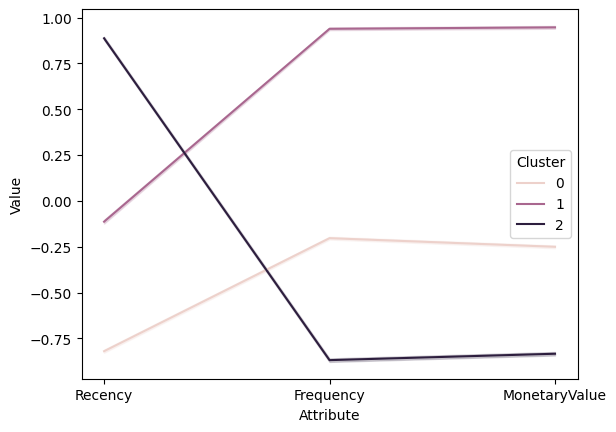

In [ ]:
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)
